In [1]:
# In this project we are going to analyze the dataset of Issues from Github that uses ChatGPT to review the PR's'

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# missing_values = ["N/A", "na", "--", "-"] # TODO: Please add more garbage data there

json_directory = 'github_dataset'

# List all JSON files in the directory
json_files = [file for file in os.listdir(json_directory) if file.endswith(".json")]

# List to store DataFrames
dataframes = []

# Loop through JSON files and read them into DataFrames
for file in json_files:
    file_path = os.path.join(json_directory, file)
    print(file_path)
    with open(file_path, 'r') as json_file:
        data = pd.read_json(json_file)
        dataframes.append(data)

# Concatenate DataFrames into a single DataFrame (optional)
data = pd.concat(dataframes, ignore_index=True)


# Load the data file
# data = pd.read_json('20230914_083202_commit_sharings.json')
refactoring_df = pd.json_normalize(data["Sources"])

print("The data set has {} rows and {} columns".format(refactoring_df.shape[0], refactoring_df.shape[1]))

display(refactoring_df.head(200))  # top rows of the refactoring commit data
display(refactoring_df.dtypes.value_counts())  # data types of the columns


# Based on the initial analysis, we have 10 columns which are object type i.e. they contain categorical data 
# and 2 remaining columns which are of int data type


github_dataset\20230727_195927_pr_sharings.json
github_dataset\20230727_195941_issue_sharings.json
github_dataset\20230803_093947_pr_sharings.json
github_dataset\20230803_094705_issue_sharings.json
github_dataset\20230810_123110_pr_sharings.json
github_dataset\20230810_123938_issue_sharings.json
github_dataset\20230817_125147_pr_sharings.json
github_dataset\20230817_130502_issue_sharings.json
github_dataset\20230824_100450_pr_sharings.json
github_dataset\20230824_101836_issue_sharings.json
github_dataset\20230831_060603_pr_sharings.json
github_dataset\20230831_061759_issue_sharings.json
github_dataset\20230907_091631_pr_sharings.json
github_dataset\20230907_092956_issue_sharings.json
github_dataset\20230914_074826_pr_sharings.json
github_dataset\20230914_080417_issue_sharings.json
The data set has 4000 rows and 20 columns


,Type,URL,Author,RepoName,RepoLanguage,Number,Title,Body,CreatedAt,ClosedAt,MergedAt,UpdatedAt,State,Additions,Deletions,ChangedFiles,CommitsTotalCount,CommitShas,ChatgptSharing,CommitSha
0,pull request,https://github.com/labdao/plex/pull/469,AdamGoyer,labdao/plex,Go,469,add readme for openbabel to PLEX,The Chatgpt Thread used to create this pull re...,2023-07-05T03:30:54Z,None,None,2023-07-05T03:30:59Z,OPEN,42.0,0.0,1.0,1.0,[a41124a8d7f8d54d68b777bd3781734188d35873],[{'URL': 'https://chat.openai.com/share/8bd338...,NaN
1,pull request,https://github.com/labdao/plex/pull/468,AdamGoyer,labdao/plex,Go,468,add readme for Gnina #462,Link to the ChatGPT conversation used to creat...,2023-07-05T02:53:12Z,None,None,2023-07-05T04:20:31Z,OPEN,45.0,0.0,1.0,1.0,[8199fe4135efd1500e3dc5c868048aa3cf118cb4],[{'URL': 'https://chat.openai.com/share/2c4b0d...,NaN
2,pull request,https://github.com/ActivityWatch/aw-webui/pull...,ErikBjare,ActivityWatch/aw-webui,Vue,455,feat: improved categorization helper to includ...,Came up with this while thinking about the bug...,2023-06-22T15:47:50Z,None,None,2023-06-22T15:52:32Z,OPEN,78.0,19.0,1.0,1.0,[c93f546f2b9d2b97a6f340d4a1859f2aa80fd0a7],[{'URL': 'https://chat.openai.com/share/0c7588...,NaN
3,pull request,https://github.com/open-learning-exchange/mypl...,Okuro3499,open-learning-exchange/myplanet,Java,2229,adding French to strings (fixes #2216),this pull request contains french translations...,2023-07-20T14:16:56Z,2023-07-24T10:20:08Z,2023-07-24T10:20:08Z,2023-07-24T10:41:16Z,MERGED,789.0,789.0,3.0,5.0,"[addd73142e988aae5ece154537a3a62fea0b8416, 763...",[{'URL': 'https://chat.openai.com/share/be516f...,NaN
4,pull request,https://github.com/sleepyRias/RASandbox/pull/76,Multi538,sleepyRias/RASandbox,Vue,76,72 router,,2023-07-24T15:04:07Z,None,None,2023-07-24T15:54:59Z,OPEN,108.0,25.0,5.0,7.0,"[e2b47280b45d47ed76a1134d51ebbbe989548b1b, 824...",[{'URL': 'https://chat.openai.com/share/d2809b...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,issue,https://github.com/deep-foundation/deepcase-ap...,Konard,deep-foundation/deepcase-app,TypeScript,119,"Center menu does not center links, but puts th...",![59A7122E-7E1C-42DB-AFF2-529E167AFC78](https:...,2023-04-17T21:07:26Z,None,NaN,2023-07-16T06:18:15Z,OPEN,NaN,NaN,NaN,NaN,NaN,[{'URL': 'https://chat.openai.com/share/8d9884...,NaN
196,issue,https://github.com/Ratescale/spaceweather/issu...,rensanrenren,Ratescale/spaceweather,Python,5,プラン1: OSMと地理院地図から送電網データセットを取得してMapbox Studioにプ...,やり方まとめましょう,2023-06-01T17:20:40Z,None,NaN,2023-06-01T17:21:26Z,OPEN,NaN,NaN,NaN,NaN,NaN,[{'URL': 'https://chat.openai.com/share/4d816a...,NaN
197,issue,https://github.com/Ratescale/Satellite-Instrum...,rensanrenren,Ratescale/Satellite-Instrument-Info-Manager,Python,2,データ収集と管理の仕組みの構築,## データ収集と管理の仕組みの構築\r\n\r\n1. **データ収集スクリプトの作成**...,2023-06-02T09:53:48Z,None,NaN,2023-06-02T11:40:15Z,OPEN,NaN,NaN,NaN,NaN,NaN,[{'URL': 'https://chat.openai.com/share/f00122...,NaN
198,issue,https://github.com/multitheftauto/mtasa-blue/i...,CrosRoad95,multitheftauto/mtasa-blue,C++,3056,Suggestion: add option to specify screen on wh...,### Is your feature request related to a probl...,2023-06-04T15:34:16Z,None,NaN,2023-06-04T15:34:16Z,OPEN,NaN,NaN,NaN,NaN,NaN,[{'URL': 'https://chat.openai.com/share/ea8065...,NaN


object     15
float64     4
int64       1
dtype: int64

In [4]:
refactoring_df.dtypes == 'object'  # showing the columns with object data type


Type                  True
URL                   True
Author                True
RepoName              True
RepoLanguage          True
Number               False
Title                 True
Body                  True
CreatedAt             True
ClosedAt              True
MergedAt              True
UpdatedAt             True
State                 True
Additions            False
Deletions            False
ChangedFiles         False
CommitsTotalCount    False
CommitShas            True
ChatgptSharing        True
CommitSha             True
dtype: bool

In [5]:
"""
As a part of the data cleaning process, we will perform the following four steps:

1. Remove the duplicate rows

2. Finding how many columns have missing data and in what quantity?

3. Replace missing fields with alternative values, For ex: RepoLanguage==None will be replace with RepoLanguage==Multiple Languages

"""

'\nAs a part of the data cleaning process, we will perform the following four steps:\n\n1. Remove the duplicate rows\n\n2. Finding how many columns have missing data and in what quantity?\n\n3. Replace missing fields with alternative values, For ex: RepoLanguage==None will be replace with RepoLanguage==Multiple Languages\n\n'

In [6]:
# Removing the duplicate rows
# refactoring_df.drop_duplicates()

In [7]:
# checking the nan/null values in the data
refactoring_df.isnull().sum().sort_values(ascending=False)


# As we can see that there are 
#     1. 122 rows with missing data in the `RepoLanguage` field and 
#     2. 100 rows with missing data in the `MergedAt` field
#     3. 79 rows with missing data in the `ClosedAt` field

CommitSha            3341
CommitShas           3233
MergedAt             2920
CommitsTotalCount    2574
ChangedFiles         2574
Deletions            2574
Additions            2574
ClosedAt             1561
RepoLanguage          368
UpdatedAt               0
State                   0
ChatgptSharing          0
CreatedAt               0
Body                    0
Title                   0
Number                  0
RepoName                0
Author                  0
URL                     0
Type                    0
dtype: int64

In [8]:
refactoring_df.dropna(axis = 0, subset = ['ChatgptSharing'], how = 'any', inplace=True)

print("The filtered data set has {} rows and {} columns".format(refactoring_df.shape[0], refactoring_df.shape[1]))

The filtered data set has 4000 rows and 20 columns


In [9]:
# For missing `RepoLanguage` field, we are forming it using `Multiple language` as we have checked that multiple programming
# languages are being used in certain repositories and their RepoLanguage is not set, So by default their value is None.

# Define a function to fill null values in 'RepoLanguage' column
def replace_repoLanguage_func(row):    
    if pd.isnull(row['RepoLanguage']):
        return "Multiple Languages"
    
    return row['RepoLanguage']
    
def replace_closedAt_func(row):
    if pd.isnull(row['ClosedAt']):
        return "0000-00-00T00:00:00Z"
    
    return row['ClosedAt']
    
	
# # Apply the lambda function to update the 'None' column
refactoring_df['RepoLanguage'] = refactoring_df.apply(replace_repoLanguage_func, axis=1)
refactoring_df['ClosedAt'] = refactoring_df.apply(replace_closedAt_func, axis=1)

refactoring_df.isnull().sum().sort_values(ascending=False)


CommitSha            3341
CommitShas           3233
MergedAt             2920
CommitsTotalCount    2574
ChangedFiles         2574
Deletions            2574
Additions            2574
Title                   0
URL                     0
Author                  0
RepoName                0
RepoLanguage            0
Number                  0
ClosedAt                0
Body                    0
CreatedAt               0
ChatgptSharing          0
UpdatedAt               0
State                   0
Type                    0
dtype: int64

In [10]:
import re

# Define regular expressions for bug categories
bug_categories = {
    "Null Pointer Exception": re.compile(r"(?i)null pointer|NPE"),
    "String Exception": re.compile(r"(?i)string (index|out of range)|stringexception"),
    "Division by Zero": re.compile(r"(?i)division by zero|divide by zero|zerodivision"),
    "Memory Leak": re.compile(r"(?i)memory leak|leaked memory|memory leak detected"),
    "File Not Found": re.compile(r"(?i)file not found|file not found exception"),
    "Index Out of Bounds": re.compile(r"(?i)index out of bounds|out of bounds"),
    "Type Error": re.compile(r"(?i)type error|type mismatch|typeerror"),
    "Logic Error": re.compile(r"(?i)logic error|logical error|inconsistent logic"),
    "Performance Issue": re.compile(r"(?i)performance issue|performance problem|slow performance"),
    "Security Vulnerability": re.compile(r"(?i)security issue|security vulnerability|security problem"),
    "Compatibility Issue": re.compile(r"(?i)compatibility issue|compatibility problem|incompatibility"),
    "Race Condition": re.compile(r"(?i)race condition|concurrency issue|race hazard"),
    "Deadlock": re.compile(r"(?i)deadlock|deadly embrace|deadly embrace condition"),
    "Infinite Loop": re.compile(r"(?i)infinite loop|endless loop|looping indefinitely"),
    "Resource Leak": re.compile(r"(?i)resource leak|resource leakage|resource not released"),
    "Data Corruption": re.compile(r"(?i)data corruption|corrupted data|data integrity issue"),
    "Timeout Error": re.compile(r"(?i)timeout error|timed out|exceeded timeout"),
}

bug_category_counts = {category: 0 for category in bug_categories}

dfs = []
for index, item in refactoring_df.iterrows():
    repositoryName = str(item['RepoName'])
    userName = str(item['Author'])
    number =item['Number']
    body = str(item['Body'])
    title = str(item['Title'])
    chatgptsharing = str(item['ChatgptSharing'])
    
    review_text = f"{title} {body} {chatgptsharing}"
    bugCategory = ""
    
    for category, pattern in bug_categories.items():
        count = len(pattern.findall(review_text))
        bug_category_counts[category] += count
        if count>0:
            bugCategory += category
        print(f"{repositoryName} {bugCategory}")
        
    data = {
        "Title": [title],
        "URL": [str(item['URL'])],
        "Author": [userName],
        "RepoName": [repositoryName],
        "RepoLanguage": [str(item['RepoLanguage'])],
        "Number": [number],
        "ClosedAt": [str(item['ClosedAt'])],
        "Body": [body],
        "CreatedAt": [str(item['CreatedAt'])],
        "ChatGptSharing": [chatgptsharing],
        "UpdatedAt": [str(item['UpdatedAt'])],
        "State": [str(item['State'])],
        "Type": [str(item['Type'])],
        "Bug": [bugCategory],
    }

    labeled_df = pd.DataFrame(data)

    # Append the DataFrame to the list of DataFrames
    dfs.append(labeled_df)


# Print the bug category counts
for category, count in bug_category_counts.items():
    if count > 0:
        print(f"{category}: {count} mention(s)")
        

Null Pointer Exception: 1696 mention(s)
Division by Zero: 220 mention(s)
Memory Leak: 12 mention(s)
File Not Found: 48 mention(s)
Index Out of Bounds: 88 mention(s)
Type Error: 2378 mention(s)
Logic Error: 58 mention(s)
Performance Issue: 322 mention(s)
Security Vulnerability: 114 mention(s)
Compatibility Issue: 506 mention(s)
Race Condition: 350 mention(s)
Deadlock: 196 mention(s)
Infinite Loop: 372 mention(s)
Data Corruption: 40 mention(s)
Timeout Error: 176 mention(s)


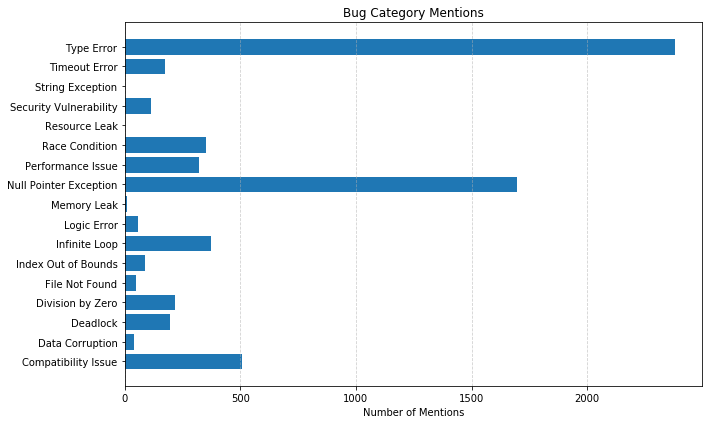

In [11]:
# Plot the bug category counts as a bar chart
categories = list(bug_category_counts.keys())
counts = list(bug_category_counts.values())
plt.figure(figsize=(10, 6))
plt.barh(categories, counts)
plt.xlabel("Number of Mentions")
plt.title("Bug Category Mentions")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [29]:
merged_df = pd.concat(dfs, ignore_index=True)
display(merged_df.head(2000))

merged_df.isnull().sum().sort_values(ascending=False)
merged_df.to_json('final_dataset.json', orient='records', lines=True)


,Title,URL,Author,RepoName,RepoLanguage,Number,ClosedAt,Body,CreatedAt,ChatGptSharing,UpdatedAt,State,Type,Bug
0,add readme for openbabel to PLEX,https://github.com/labdao/plex/pull/469,AdamGoyer,labdao/plex,Go,469,0000-00-00T00:00:00Z,The Chatgpt Thread used to create this pull re...,2023-07-05T03:30:54Z,[{'URL': 'https://chat.openai.com/share/8bd338...,2023-07-05T03:30:59Z,OPEN,pull request,
1,add readme for Gnina #462,https://github.com/labdao/plex/pull/468,AdamGoyer,labdao/plex,Go,468,0000-00-00T00:00:00Z,Link to the ChatGPT conversation used to creat...,2023-07-05T02:53:12Z,[{'URL': 'https://chat.openai.com/share/2c4b0d...,2023-07-05T04:20:31Z,OPEN,pull request,
2,feat: improved categorization helper to includ...,https://github.com/ActivityWatch/aw-webui/pull...,ErikBjare,ActivityWatch/aw-webui,Vue,455,0000-00-00T00:00:00Z,Came up with this while thinking about the bug...,2023-06-22T15:47:50Z,[{'URL': 'https://chat.openai.com/share/0c7588...,2023-06-22T15:52:32Z,OPEN,pull request,
3,adding French to strings (fixes #2216),https://github.com/open-learning-exchange/mypl...,Okuro3499,open-learning-exchange/myplanet,Java,2229,2023-07-24T10:20:08Z,this pull request contains french translations...,2023-07-20T14:16:56Z,[{'URL': 'https://chat.openai.com/share/be516f...,2023-07-24T10:41:16Z,MERGED,pull request,
4,72 router,https://github.com/sleepyRias/RASandbox/pull/76,Multi538,sleepyRias/RASandbox,Vue,76,0000-00-00T00:00:00Z,,2023-07-24T15:04:07Z,[{'URL': 'https://chat.openai.com/share/d2809b...,2023-07-24T15:54:59Z,OPEN,pull request,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"Could you please add Dockerfile, docker-compos...",https://github.com/soulhighwing/LocalGPT/issues/2,gwpl,soulhighwing/LocalGPT,JavaScript,2,0000-00-00T00:00:00Z,Could you please add\r\n\r\n* [ ] Dockerfile\r...,2023-07-01T12:25:38Z,[{'URL': 'https://chat.openai.com/share/a36228...,2023-07-01T12:25:38Z,OPEN,issue,
1996,Improvments regarding regex,https://github.com/multitheftauto/mtasa-blue/i...,CrosRoad95,multitheftauto/mtasa-blue,C++,3087,0000-00-00T00:00:00Z,### Is your feature request related to a probl...,2023-06-26T12:48:33Z,[{'URL': 'https://chat.openai.com/share/63d127...,2023-07-20T16:21:41Z,OPEN,issue,Security Vulnerability
1997,When was I starred this?,https://github.com/Yukaii/open-source-ideas/is...,Yukaii,Yukaii/open-source-ideas,Multiple Languages,67,0000-00-00T00:00:00Z,A fun project utilizing the GitHub API. Users ...,2023-03-13T02:05:46Z,[{'URL': 'https://chat.openai.com/share/039dc3...,2023-06-18T09:40:57Z,OPEN,issue,
1998,Firebase,https://github.com/mostypc123/XediX/issues/6,mostypc123,mostypc123/XediX,Python,6,2023-08-14T14:47:48Z,How to connect Python to Firebase?,2023-08-14T14:46:20Z,[{'URL': 'https://chat.openai.com/share/7e07c0...,2023-08-14T14:47:48Z,CLOSED,issue,


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

merged_df = merged_df.dropna(subset=["Title"])
merged_df = merged_df[merged_df["Title"].apply(lambda x: isinstance(x, str))]

# Split the dataset into features (X) and the target variable (y)
X = merged_df["Title"]  # Using the "Title" column as the input feature
y = merged_df["Bug"]  # Assuming "BugCategory" contains bug category labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,train_size=0.75, random_state=42)

# Create a TF-IDF vectorizer to convert text data to numerical features
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features as needed

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train a logistic regression classifier
clf = LogisticRegression(max_iter=1000)  # You may need to increase the max_iter based on your data
clf.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_rep = confusion_matrix(y_test,y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.909 %

Classification Report:
                                                           precision    recall  f1-score   support

                                                                0.91      1.00      0.95       862
                                      Compatibility Issue       1.00      0.60      0.75         5
                        Compatibility IssueRace Condition       0.00      0.00      0.00         3
                                          Data Corruption       0.00      0.00      0.00         1
                                                 Deadlock       0.00      0.00      0.00         5
                                    DeadlockInfinite Loop       0.00      0.00      0.00         3
                                         Division by Zero       1.00      1.00      1.00         2
                                           File Not Found       0.00      0.00      0.00         5
                                            Infinite Loop       1.

F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf